In [1228]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dataframe_image as dfi
from scipy import stats
import seaborn as sns

In [1229]:
# Load dataset
df = pd.read_csv('Final_data.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/2019,488,14.0,36.1,17.30,50.409836,486.45,Alabama
1,12/31/2019,824,10.9,36.1,23.00,50.970874,810.11,Arizona
2,12/31/2019,193,13.6,37.4,15.60,55.958549,192.48,Arkansas
3,12/31/2019,5566,10.1,26.2,12.25,51.257636,5558.86,California
4,12/31/2019,545,7.0,23.8,17.20,47.339450,538.54,Colorado


In [1230]:
df.sort_values(by=['Year'], inplace=True, ascending=True)
df = df.loc[df['State']=='Wisconsin']
df

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1199,12/31/1995,492,4.4,16.4,1.6,45.528455,487.99,Wisconsin
1151,12/31/1996,504,4.6,17.0,1.6,48.809524,500.39,Wisconsin
1103,12/31/1997,535,4.9,17.6,1.6,45.981308,532.27,Wisconsin
1055,12/31/1998,548,5.1,18.2,1.6,48.905109,545.69,Wisconsin
1007,12/31/1999,564,5.4,18.8,1.6,47.517730,560.94,Wisconsin
959,12/31/2000,533,5.7,19.4,2.2,48.405253,531.98,Wisconsin
911,12/31/2001,592,5.8,19.9,2.6,45.945946,588.38,Wisconsin
863,12/31/2002,644,5.9,20.4,3.2,46.273292,639.43,Wisconsin
815,12/31/2003,514,6.0,20.9,3.7,45.525292,510.79,Wisconsin
767,12/31/2004,726,5.6,21.9,4.1,45.730028,721.39,Wisconsin


In [1231]:
df_output = df.tail(1)
lastyear_df = df_output.drop(columns=['Year', 'Waitlist','Diabetes','Obesity','Overdose','Pct_O','State'])
lastyear_df = lastyear_df.reset_index(drop=True)
lastyear_df

,Total_Adj
0,637.35


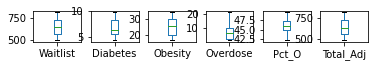

In [1232]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

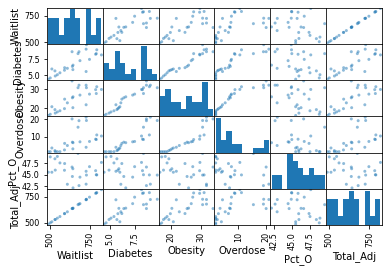

In [1233]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [1234]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,648.560000,6.884000,24.880000,7.908000,45.885003,645.846800
std,98.964253,1.600177,5.536018,6.416705,1.985033,99.354759
min,492.000000,4.400000,16.400000,1.600000,42.170543,487.990000
25%,564.000000,5.700000,19.900000,2.600000,44.917582,560.940000
50%,644.000000,6.400000,25.500000,6.700000,45.859873,639.430000
75%,726.000000,8.400000,29.800000,10.500000,47.386172,723.790000
max,821.000000,9.800000,34.200000,21.200000,49.556213,818.590000


In [1235]:
#Correlation Matrix
corr_matrix = df[["Diabetes", "Obesity", "Overdose", "Pct_O"]].corr()
print(corr_matrix)

          Diabetes   Obesity  Overdose     Pct_O
Diabetes  1.000000  0.958775  0.899381 -0.303004
Obesity   0.958775  1.000000  0.910295 -0.324777
Overdose  0.899381  0.910295  1.000000 -0.315672
Pct_O    -0.303004 -0.324777 -0.315672  1.000000


In [1236]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [1237]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1238]:
#Create model
model = LinearRegression()

In [1239]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9001319450603151
Testing Score: 0.5762911663375694


Text(0.5, 1.0, 'Residual Plot')

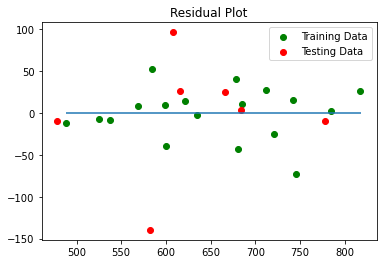

In [1240]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End

In [1241]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.8031241662741243


In [1242]:
print(model.intercept_)

[154.77401657]


In [1243]:
print(model.coef_)

[[ 72.69339631  10.16273063 -15.56482736  -3.03815349]]


In [1244]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[10.77,32,19.9,49]])
print(predictedTotal_Adj)

[[804.27968941]]


In [1245]:
print(X_train.shape)

(18, 4)


In [1246]:
print(y_train.shape)

(18, 1)


In [1247]:
print(y_test.shape)

(7, 1)


In [1248]:
print(X_test.shape)

(7, 4)


In [1249]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [1250]:
print(X.shape)

(25, 4)


In [1251]:
print(y.shape)

(25, 1)


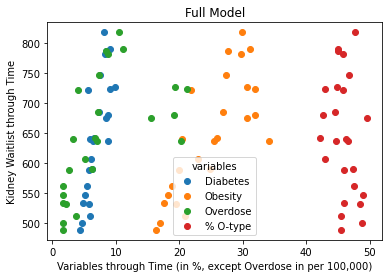

In [1252]:
plt.scatter(X[('Diabetes')], y, label='Diabetes')
plt.scatter(X[('Obesity')], y, label='Obesity')
plt.scatter(X[('Overdose')], y, label='Overdose')
plt.scatter(X[('Pct_O')], y, label='% O-type')
plt.title('Full Model')
plt.xlabel('Variables through Time (in %, except Overdose in per 100,000)')
plt.ylabel('Kidney Waitlist through Time')
plt.legend(title='variables',loc='lower center')
plt.savefig('images/Wisconsin_full.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
plt.show()

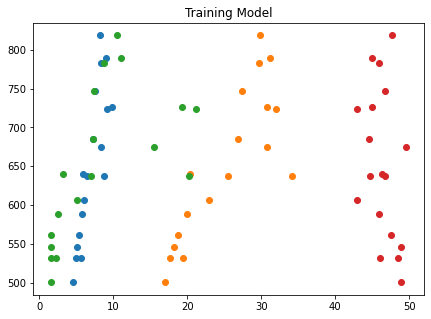

In [1253]:
fig = plt.figure()
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
fig.set_size_inches(7,5)
plt.show()

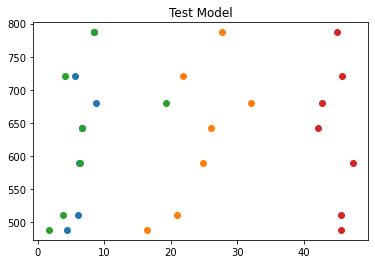

In [1254]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

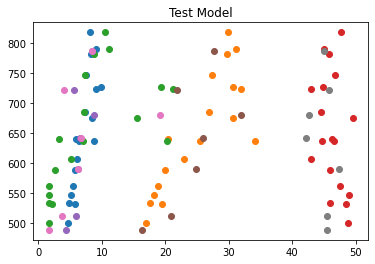

In [1255]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

In [1256]:
model_lin = sm.OLS.from_formula("Total_Adj ~ Diabetes + Obesity + Overdose + Pct_O", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_Adj   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     20.70
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.04e-07
Time:                        22:36:59   Log-Likelihood:                -129.47
No. Observations:                  25   AIC:                             268.9
Df Residuals:                      20   BIC:                             275.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.6241    264.353      0.502      0.621    -418.806     684.055
Diabetes      62.5317     22.146      2.824      0.010      16.335     108.728
Obesity       12.4445      6.784      1.834      0.082      -1.706      26.595
Overdose     -15.1663      3.794     -3.997      0.001     -23.081      -7.252
Pct_O         -2.3304      5.232     -0.445      0.661     -13.243       8.583
==============================================================================
Omnibus:                       10.009   Durbin-Watson:                   2.731
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.679
Skew:                           0.910   Prob(JB):                      0.00791
Kurtosis:                       5.446   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1257]:
df


,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1199,12/31/1995,492,4.4,16.4,1.6,45.528455,487.99,Wisconsin
1151,12/31/1996,504,4.6,17.0,1.6,48.809524,500.39,Wisconsin
1103,12/31/1997,535,4.9,17.6,1.6,45.981308,532.27,Wisconsin
1055,12/31/1998,548,5.1,18.2,1.6,48.905109,545.69,Wisconsin
1007,12/31/1999,564,5.4,18.8,1.6,47.517730,560.94,Wisconsin
959,12/31/2000,533,5.7,19.4,2.2,48.405253,531.98,Wisconsin
911,12/31/2001,592,5.8,19.9,2.6,45.945946,588.38,Wisconsin
863,12/31/2002,644,5.9,20.4,3.2,46.273292,639.43,Wisconsin
815,12/31/2003,514,6.0,20.9,3.7,45.525292,510.79,Wisconsin
767,12/31/2004,726,5.6,21.9,4.1,45.730028,721.39,Wisconsin


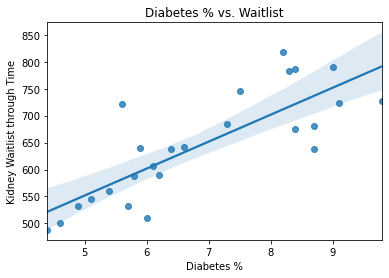

In [1258]:
sns.regplot(X[('Diabetes')],y)
plt.title('Diabetes % vs. Waitlist')
plt.xlabel('Diabetes %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Wisconsin_diabetes.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

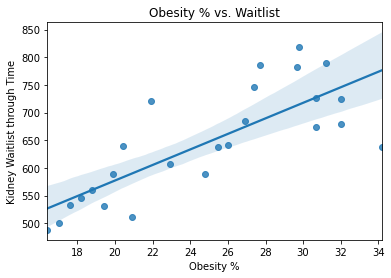

In [1259]:
sns.regplot(X[('Obesity')],y)
plt.title('Obesity % vs. Waitlist')
plt.xlabel('Obesity %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Wisconsin_obesity.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

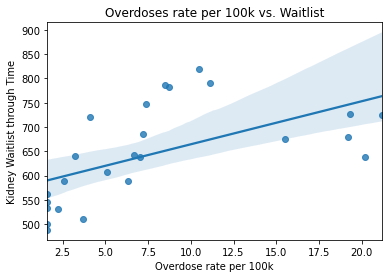

In [1260]:
sns.regplot(X[('Overdose')],y)
plt.xlabel('Overdose rate per 100k')
plt.title('Overdoses rate per 100k vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Wisconsin_overdose.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

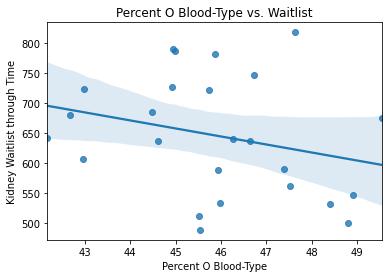

In [1261]:
sns.regplot(X[('Pct_O')],y)
plt.xlabel('Percent O Blood-Type')
plt.title('Percent O Blood-Type vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Wisconsin_pct_O.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

<AxesSubplot:xlabel='Pct_O'>

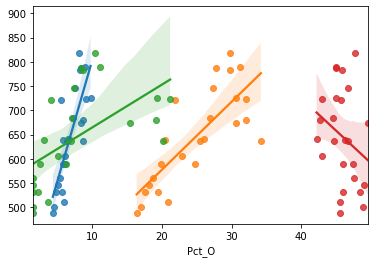

In [1262]:
sns.regplot(X[('Diabetes')],y)
sns.regplot(X[('Obesity')],y)
sns.regplot(X[('Overdose')],y)
sns.regplot(X[('Pct_O')],y)

In [1263]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients_transposed = coefficients.T
coefficients_transposed
coefficients_final = coefficients_transposed[1:]
coefficients_final

,0,1,2,3
0,72.6934,10.1627,-15.5648,-3.03815


In [1264]:
test_df = pd.DataFrame([[r_sq,training_score,testing_score,model.intercept_ ,predictedTotal_Adj]])
test_df

,0,1,2,3,4
0,0.803124,0.900132,0.576291,[154.77401657265966],[[804.2796894092347]]


In [1265]:
#dfi.export(test_df, 'test_df.png')

In [1266]:
summary_df = pd.concat([test_df, lastyear_df, coefficients_final], axis=1)
summary_df.columns = ['R2','Training Score', 'Test Score', 'Intercept','Forecast based on Natl Avg','Last Waitlist','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O']

In [1267]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.803124,0.900132,0.576291,[154.77401657265966],[[804.2796894092347]],637.35,72.6934,10.1627,-15.5648,-3.03815


In [1268]:
summary_df.dtypes

R2                            float64
Training Score                float64
Test Score                    float64
Intercept                      object
Forecast based on Natl Avg     object
Last Waitlist                 float64
Coef_Diabetes                  object
Coef_Obesity                   object
Coef_Overdose                  object
Coef_Pct_O                     object
dtype: object

In [1269]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.803124,0.900132,0.576291,[154.77401657265966],[[804.2796894092347]],637.35,72.6934,10.1627,-15.5648,-3.03815


In [1270]:
summary_df['Intercept'] = summary_df['Intercept'].astype(int)
summary_df['Forecast based on Natl Avg'] = summary_df['Forecast based on Natl Avg'].astype(int)
summary_df['R2'] = summary_df['R2'].round(decimals=4)
summary_df['Training Score'] = summary_df['Training Score'].round(decimals=4)
summary_df['Test Score'] = summary_df['Test Score'].round(decimals=4)
summary_df = summary_df[['R2','Training Score','Test Score','Intercept','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O','Last Waitlist','Forecast based on Natl Avg']]
dfi.export(summary_df, 'images/Wisconsin_summary.png')

In [1271]:
summary_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.8031,0.9001,0.5763,154,72.6934,10.1627,-15.5648,-3.03815,637.35,804


In [1272]:
summaryalt_df = summary_df.style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})
summaryalt_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.803100,0.900100,0.576300,154,72.693396,10.162731,-15.564827,-3.038153,637.350000,804
